# Joe EDA 

This is where I'll do my EDA for the Intrusion Detection project.


In [1]:
# imports and boring stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset from csv to pandas dataframe
df = pd.read_csv('../data/UNSW_NB15/UNSW_NB15_training-set.csv')

categorical_features = ["proto", "state", "service", "attack_cat", "is_sm_ips_ports", "is_ftp_login"]

# Print first 5 rows of dataframe
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


## Exploration of Numeric Features







## Cursory Statistical Analysis of Numeric Features
Below I'll analyze the numeric features of the UNSW_NB15 dataset. I'll examine descriptive statistics (mean, median, standard deviation, variance, min, max, range) for each numeric feature in the next cell. This will help identify outliers and understand the distribution of values. I'll also create histograms and box plots to visualize these distributions, making it easier to interpret patterns and anomalies in the network traffic data. This analysis will be particularly useful for understanding how normal traffic differs from attack traffic. First we will look at the descriptive statistics for each numeric feature.

In [3]:
# Compute summary statistics for numeric features
df_numeric = df.copy()
df_numeric = df_numeric.drop(categorical_features + ['id'], axis=1)
numeric_cols = df_numeric.columns

# Calculate key statistics (mean, median, std, variance, min, max, range)
stats = pd.DataFrame({
    'Mean': df_numeric.mean(),
    'Median': df_numeric.median(),
    'StDev': df_numeric.std(),
    'Variance': df_numeric.var(),
    'Min': df_numeric.min(),
    'Max': df_numeric.max(),
    'Range': df_numeric.max() - df_numeric.min()
})

# Display statistics and class distribution
display(stats)
print(df['label'].value_counts())


,Mean,Median,StDev,Variance,Min,Max,Range
dur,1.359389e+00,0.001582,6.480249e+00,4.199363e+01,0.0,5.999999e+01,5.999999e+01
spkts,2.029866e+01,2.000000,1.368876e+02,1.873821e+04,1.0,9.616000e+03,9.615000e+03
dpkts,1.896959e+01,2.000000,1.102583e+02,1.215689e+04,0.0,1.097400e+04,1.097400e+04
sbytes,8.844844e+03,430.000000,1.747656e+05,3.054303e+10,28.0,1.296523e+07,1.296520e+07
dbytes,1.492892e+04,164.000000,1.436542e+05,2.063653e+10,0.0,1.465555e+07,1.465555e+07
rate,9.540619e+04,3225.806520,1.654010e+05,2.735748e+10,0.0,1.000000e+06,1.000000e+06
sttl,1.795470e+02,254.000000,1.029400e+02,1.059665e+04,0.0,2.550000e+02,2.550000e+02
dttl,7.960957e+01,29.000000,1.105069e+02,1.221177e+04,0.0,2.540000e+02,2.540000e+02
sload,7.345403e+07,879674.750000,1.883574e+08,3.547853e+16,0.0,5.988000e+09,5.988000e+09
dload,6.712056e+05,1447.022705,2.421312e+06,5.862754e+12,0.0,2.242273e+07,2.242273e+07


label
1    119341
0     56000
Name: count, dtype: int64


Before i start to analyze the numeric features, i'm going to generate some histograms and box plots to visualize the distribution of each numeric feature. This cursory analysis will add some context to the statistics I just calculated.

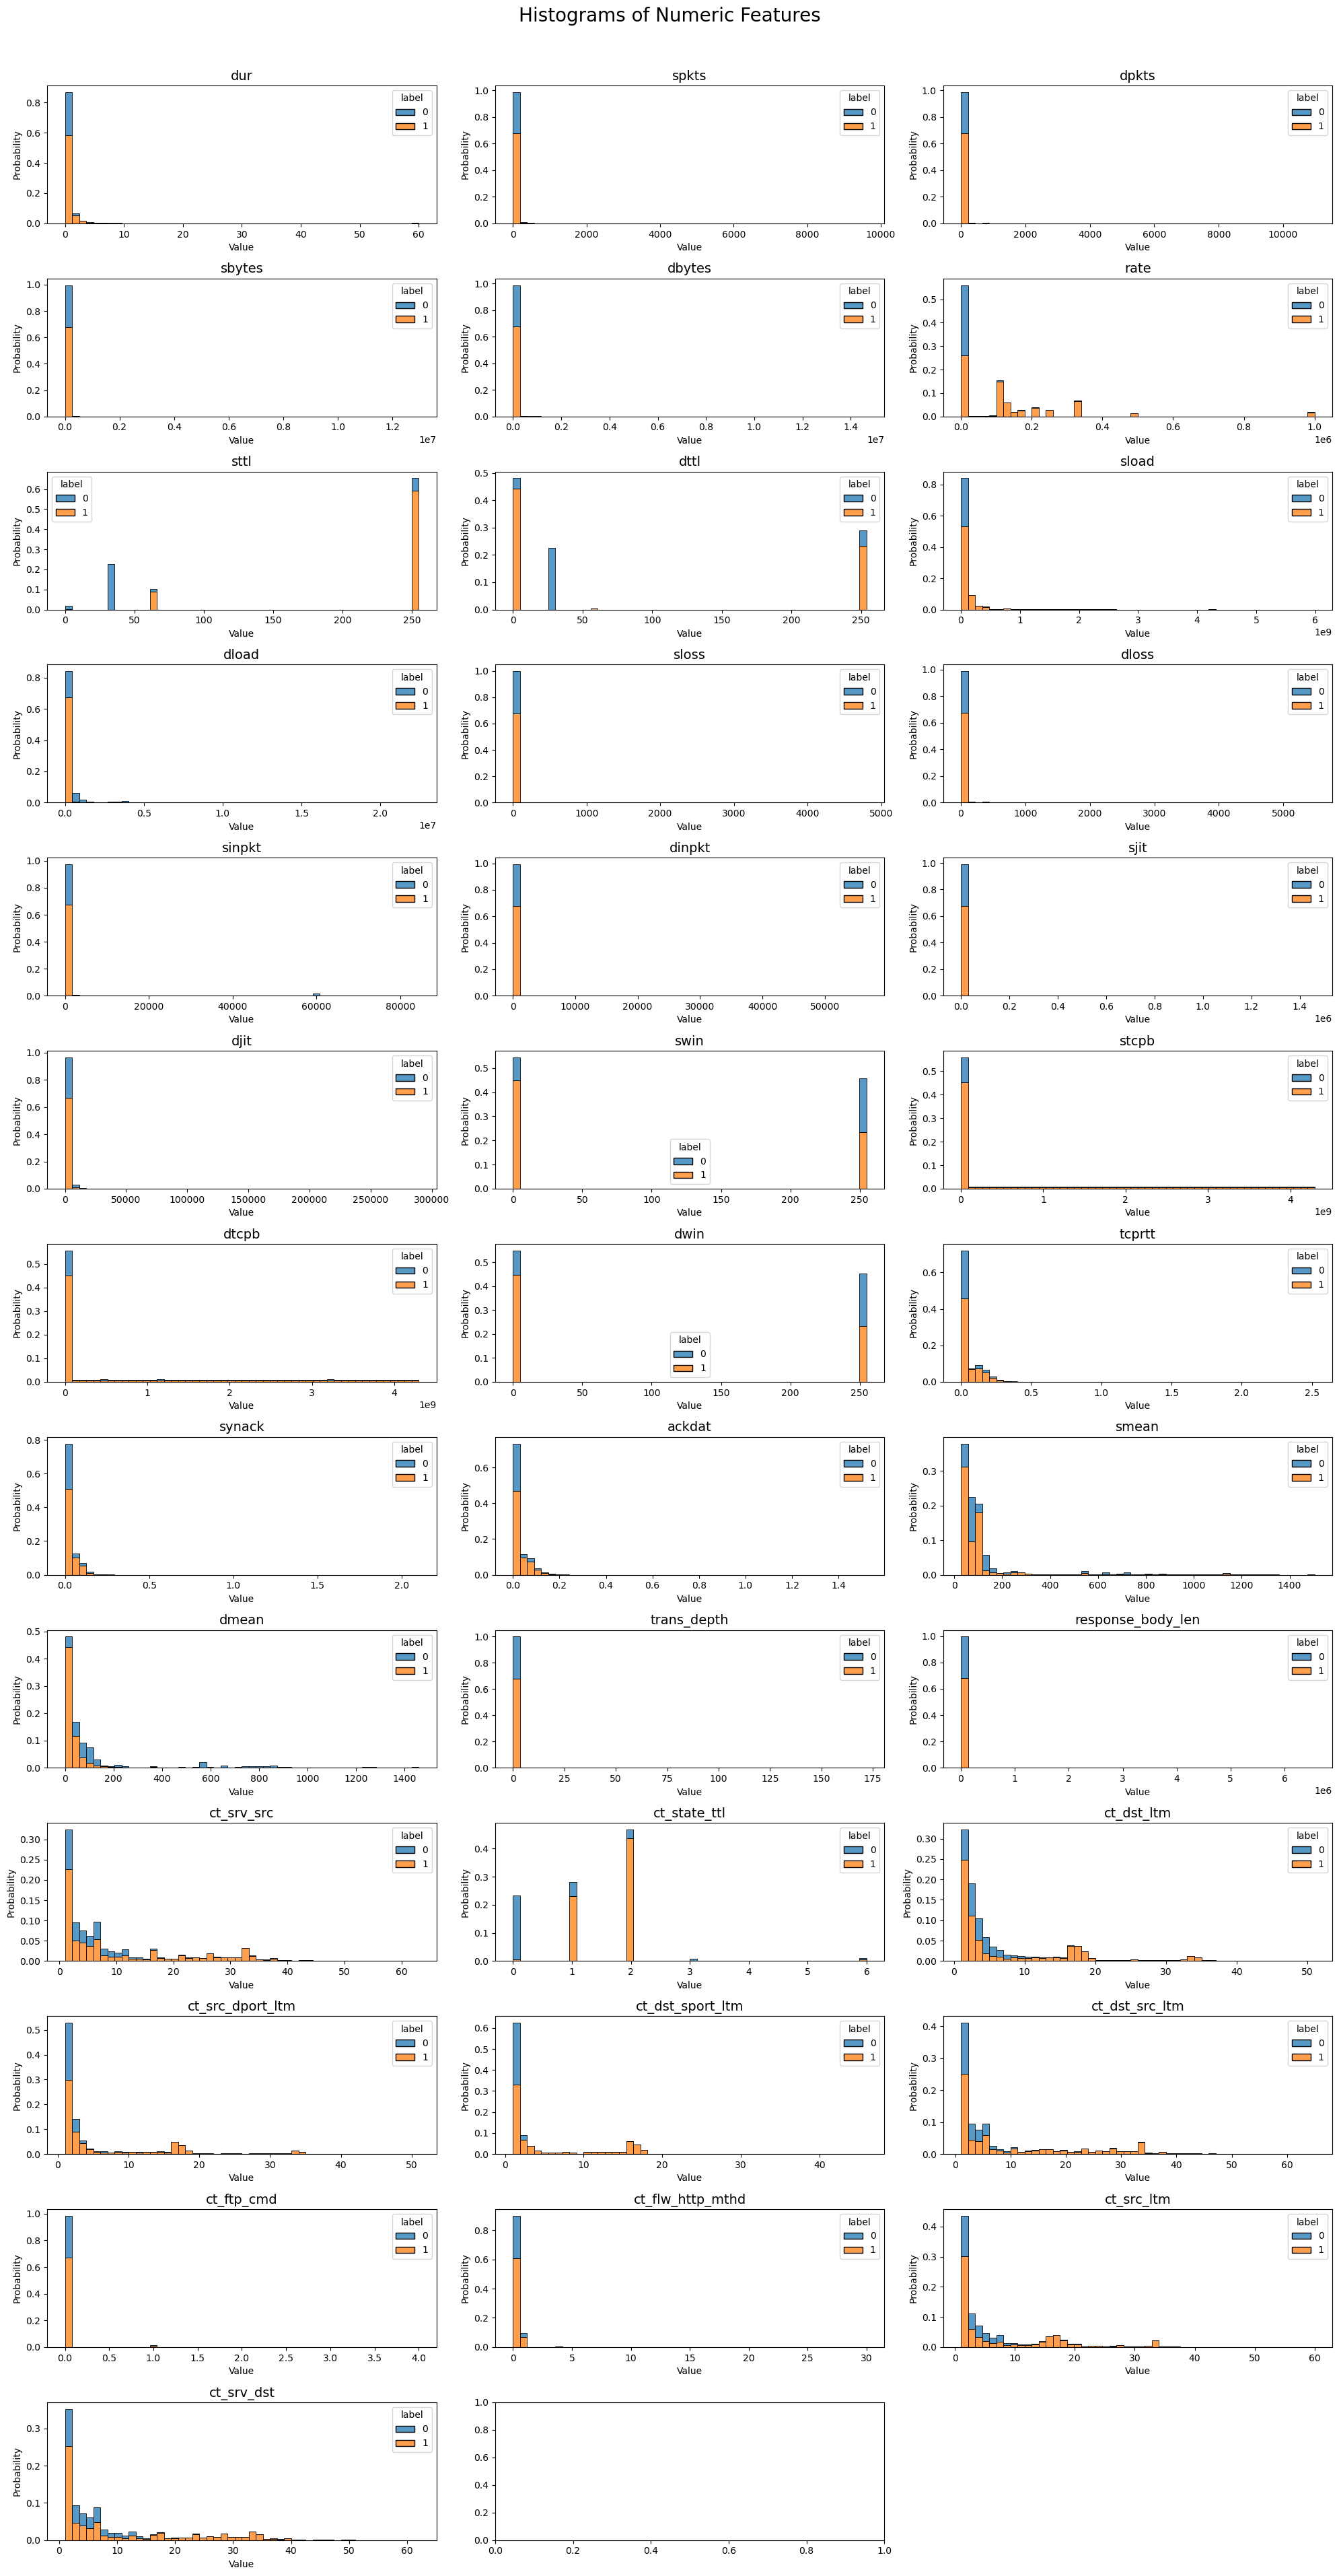

In [4]:
# Define the number of columns for the grid
num_cols = 3

# Calculate the total number of numeric features to plot (excluding 'label')
num_features = len(numeric_cols)

# Calculate rows needed based on the fixed number of columns
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

# Create figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 3 * num_rows))

# Flatten axes array for easier iteration
axes = axes.ravel()

# Generate histograms for each numeric feature
for idx, col in enumerate(numeric_cols):
    if col == 'label':
        continue  # Skip target variable
    
    # Plot histogram with stacked labels
    sns.histplot(data=df_numeric, x=col, bins=50, stat="probability", kde=False,
                 ax=axes[idx], hue='label', multiple='stack')
    
    # Set labels
    axes[idx].set_title(col, fontsize=14)  # Increased title size for individual plots
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Probability')

# Remove any unused subplots
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

# Add title and adjust layout
plt.suptitle('Histograms of Numeric Features', fontsize=20)  # Increased main title size
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4)  # Added more space at top and between plots

# Save the figure as PNG
plt.savefig('./EDA-Joe-Figures/histograms_numeric_features.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


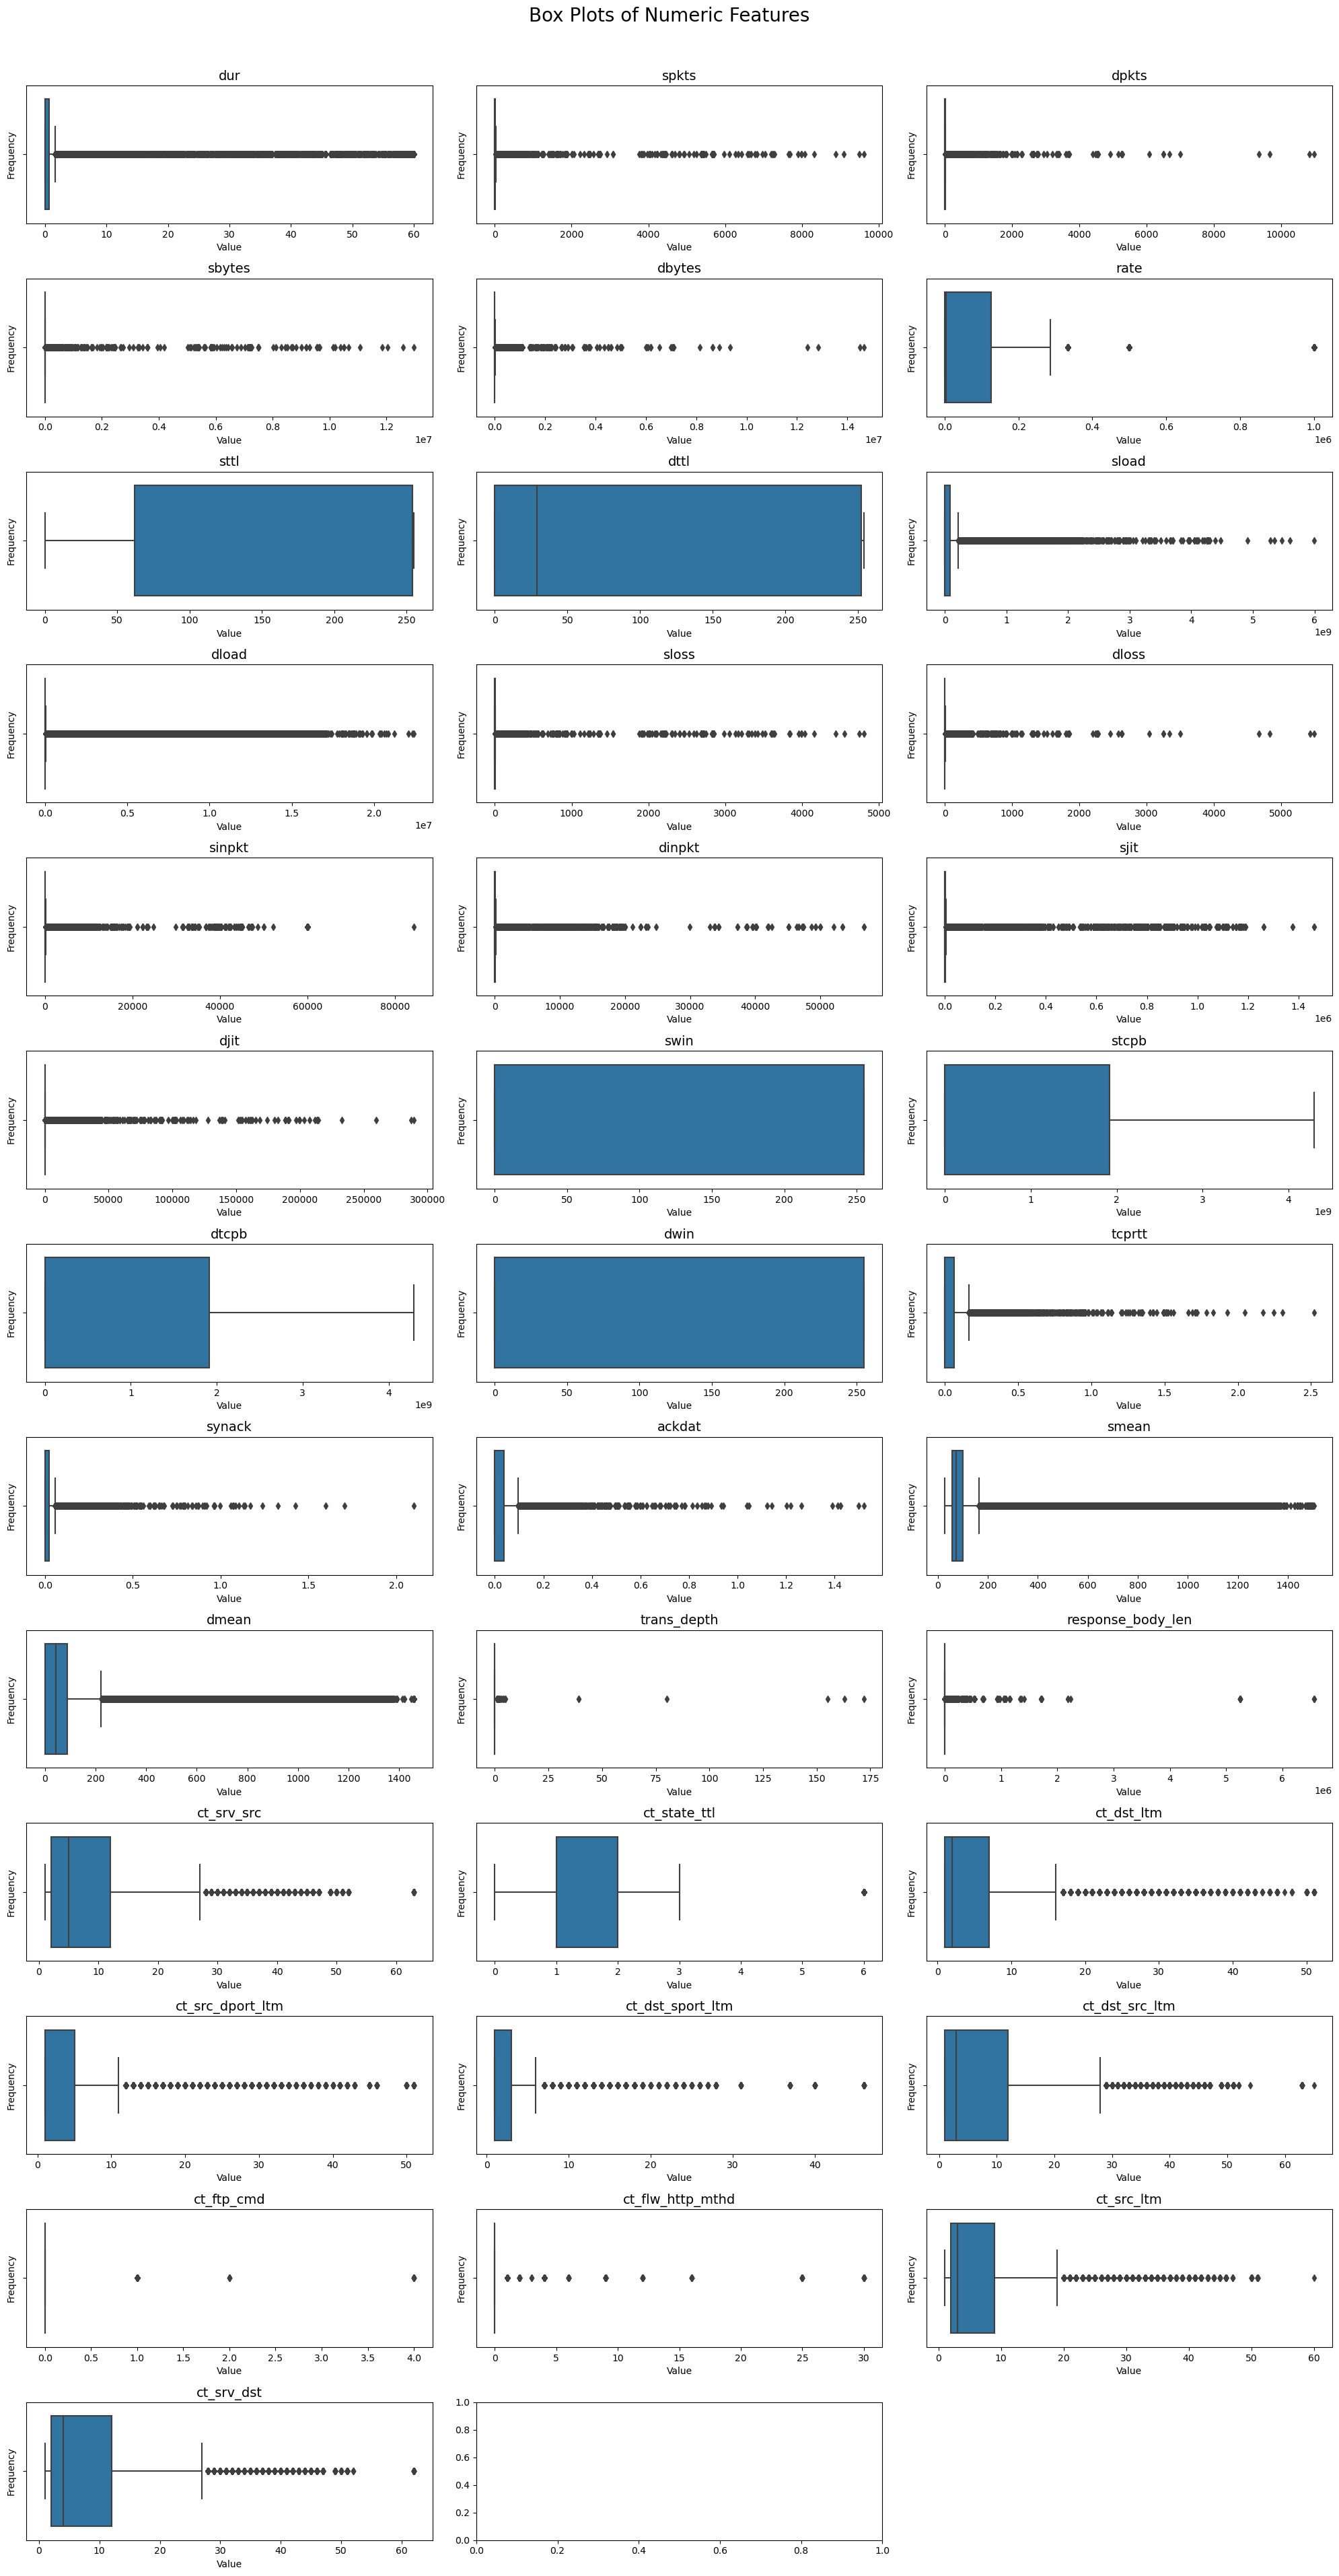

In [5]:
# Set up grid for box plots with a fixed number of columns
num_cols = 3 # Hardcoded number of columns
num_features = len(numeric_cols)
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows based on columns

# Create figure and axes with increased spacing between subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 3 * num_rows))
axes = axes.ravel()

# Generate box plots
for idx, col in enumerate(numeric_cols):
    if col == 'label':
        continue
    sns.boxplot(x=df_numeric[col], ax=axes[idx])
    axes[idx].set_title(col, fontsize=14)  # Increased title size for individual plots
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

# Clean up and display
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

# Add larger title and adjust spacing
plt.suptitle('Box Plots of Numeric Features', fontsize=20)  # Increased main title size
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4)  # Added more space at top and between plots

# Save the figure as PNG
plt.savefig('./EDA-Joe-Figures/boxplots_numeric_features.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


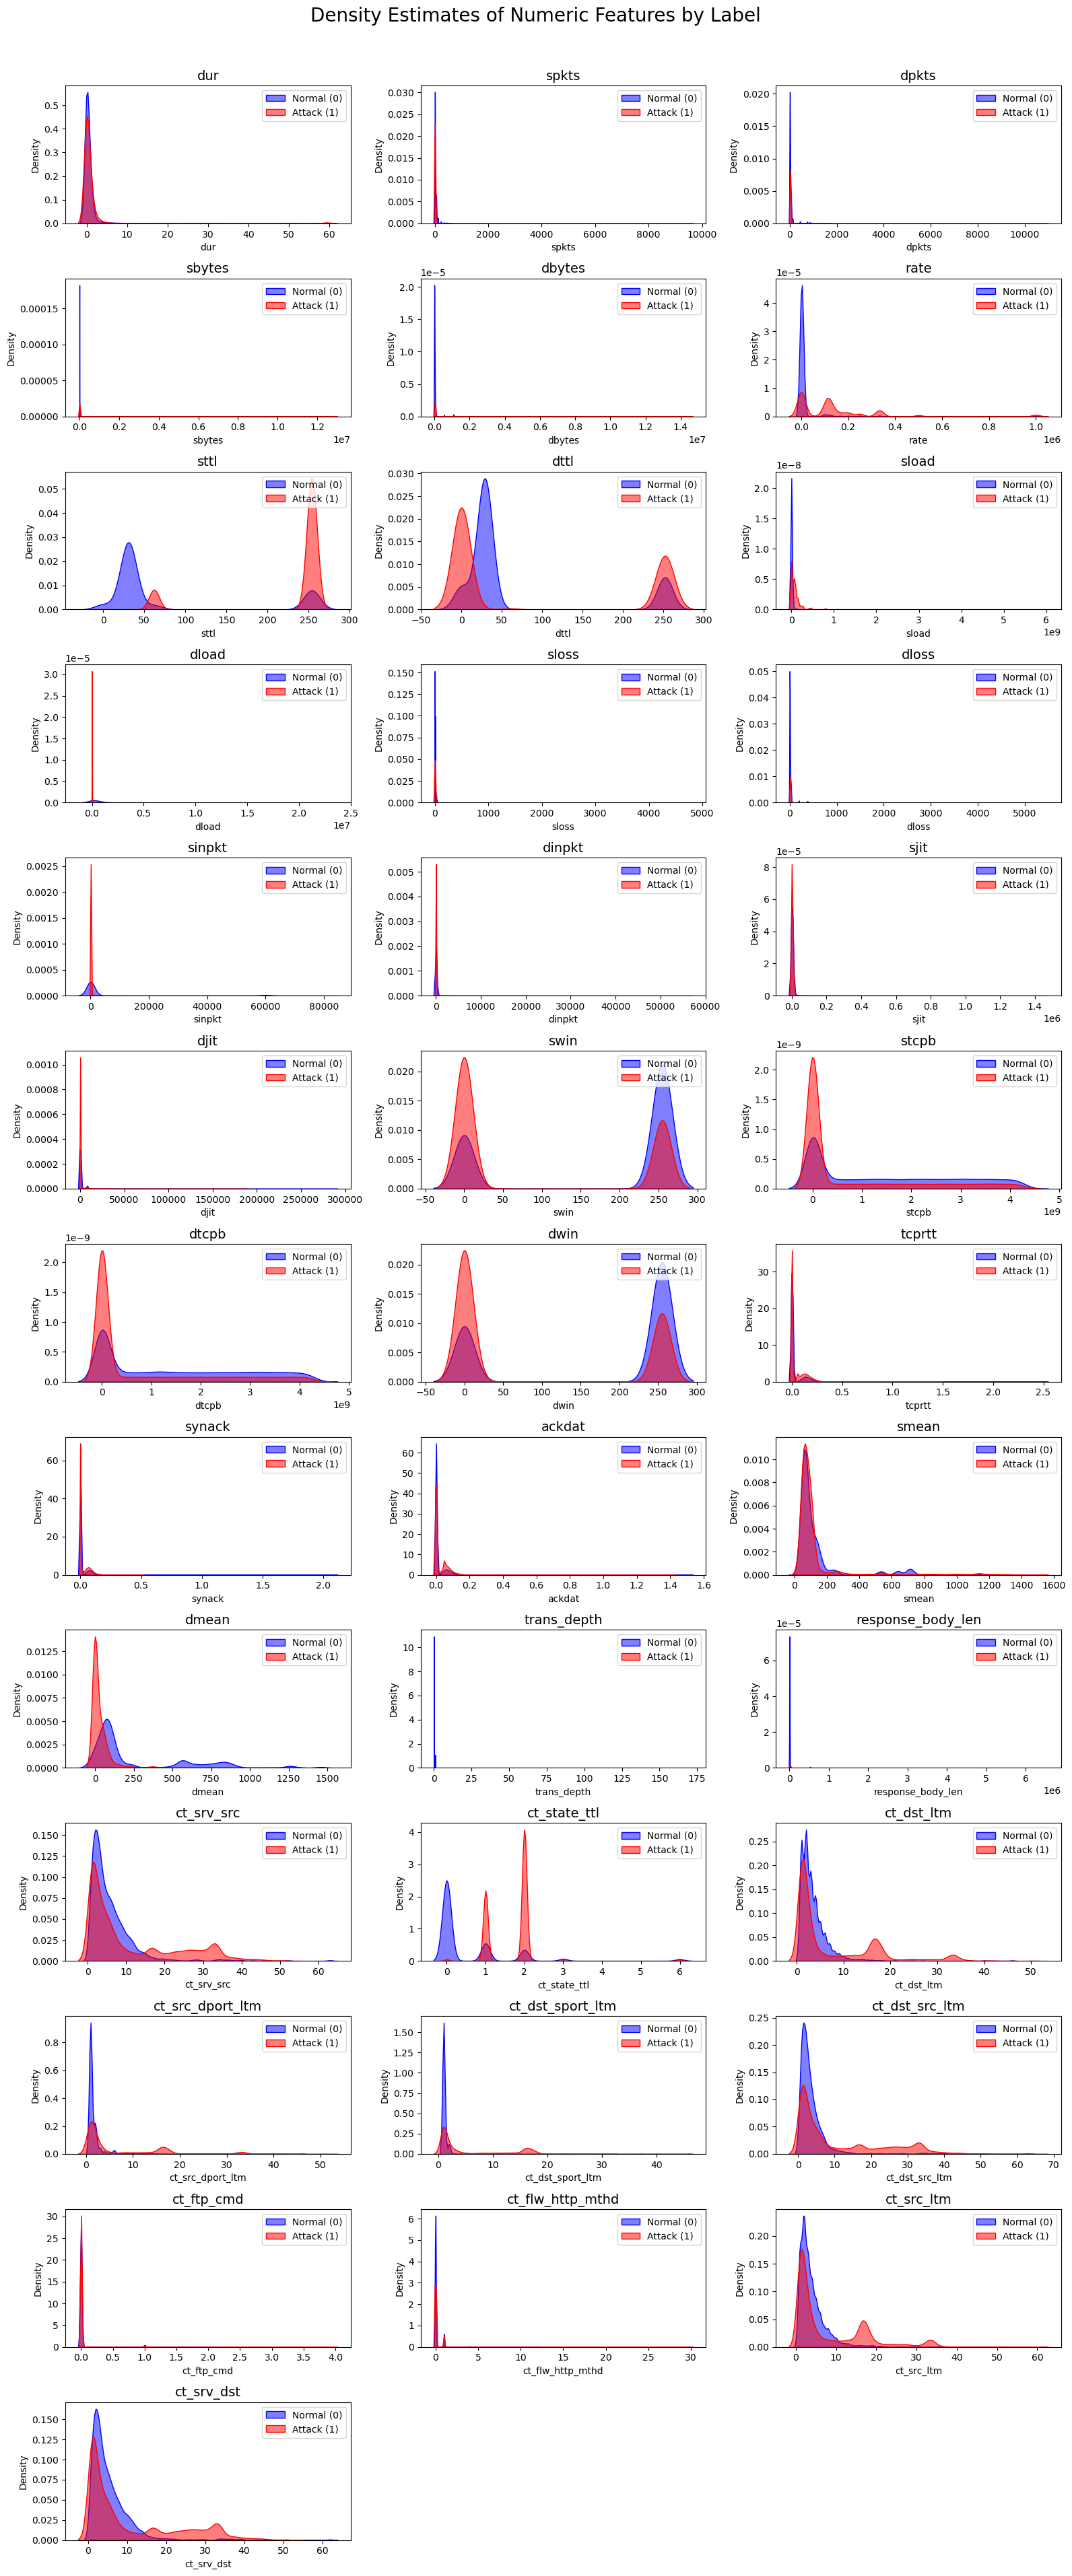

In [6]:
# Create heatmap strips of numeric features vs label
plot_cols = [col for col in numeric_cols if col != 'label']
num_plots = len(plot_cols)
num_cols = 3  # Hardcoded number of columns
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows based on columns

# Set up subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 3 * num_rows))
axes = axes.ravel()  # Flatten for easier iteration

# Create heatmap strips for each feature
for idx, col in enumerate(plot_cols):
    # Create separate plots for each label value (0 and 1)
    ax = axes[idx]
    
    # Create two separate kde plots to show density differences
    sns.kdeplot(data=df[df['label'] == 0], x=col, fill=True, common_norm=False, 
                alpha=0.5, ax=ax, color='blue', label='Normal (0)')
    sns.kdeplot(data=df[df['label'] == 1], x=col, fill=True, common_norm=False, 
                alpha=0.5, ax=ax, color='red', label='Attack (1)')
    
    ax.set_title(col, fontsize=14)  # Increased title size for individual plots
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.legend()

# Remove unused subplots
for idx in range(num_plots, len(axes)):
    fig.delaxes(axes[idx])

# Add title and adjust layout
plt.suptitle('Density Estimates of Numeric Features by Label', fontsize=20)  # Increased main title size
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4)  # Added more space at top and between plots

# Save the figure as PNG
plt.savefig('./EDA-Joe-Figures/density_heatmaps_by_label.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


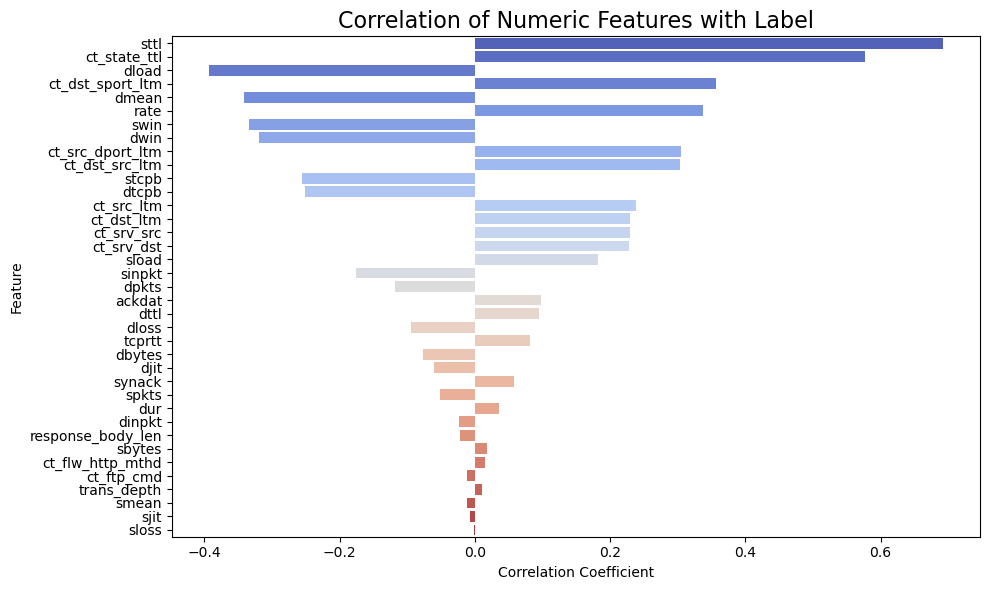

In [7]:
# Now we will determine the correlation between each numeric feature and the label, 
# sorted by absolute correlation, and display it as a pandas DataFrame.
# Compute the correlation matrix for the numeric features including the label
corr_matrix = df[numeric_cols].corr()

# Extract the correlation coefficients for each feature with 'label'
label_corr = corr_matrix['label'].drop('label')

# Sort features by the absolute value of their correlation with 'label'
label_corr = label_corr.reindex(label_corr.abs().sort_values(ascending=False).index)

# Convert the sorted correlation Series to a DataFrame for a pretty display in the notebook
label_corr_df = label_corr.to_frame(name='Correlation')

# Create a seaborn bar plot to visualize the correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=label_corr.values, y=label_corr.index, palette="coolwarm")
plt.title("Correlation of Numeric Features with Label", fontsize=16)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()

# Save the figure as PNG
plt.savefig('./EDA-Joe-Figures/numeric_feature_correlation_with_label.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


Based on this analysis, we can already see a few interesting things about the numeric features:
1. There are already features with decent correlation to the label, which will be important for model selection and feature engineering. The specific features are sttl, ct_state_ttl, dload.
2. We can see in the side by side density estimates that there are some features that have a noticeable difference in distribution between normal and attack traffic. This will be important to consider when selecting features for the model.
3. We can see that for many features there are extreme outliers, which we will need to handle by either removing them or scaling the data. 






